In [1849]:
#Import all packages needed
import pandas as pd
import numpy as np
import requests
import zipfile
import tweepy
import json
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from PIL import Image
import requests


# Data Gathering

In [1850]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [1851]:
image_pred = pd.read_csv('image-predictions.tsv',sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1852]:
# extract the file from the zipfile
with open('tweet_json.zip','rb') as T:
    z_tweets = zipfile.ZipFile(T)
    z_tweets.extractall()

# check for the extracted file
z_tweets.namelist()

['tweet_json.txt']

In [1853]:
#read the file

tweet_json = pd.read_json("tweet_json.txt")

# check the data
tweet_json.head(3)

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,38841,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,33266,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,25063,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [1854]:
len(tweet_json.columns)

30

In [1855]:
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [1856]:
# select the columns of interest : 'id', 'favorite_count','retweet_count'
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,38841,8601
1,892177421306343426,33266,6320
2,891815181378084864,25063,4194
3,891689557279858688,42214,8714
4,891327558926688256,40361,9486


In [1857]:
#df_twitter_archive = twitter_archive.copy()
#df_twitter_archive

# Assisng data 

In [1858]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1859]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [1860]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1861]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,None,None,None
197,854482394044301312,NaN,NaN,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arya. She can barely contain her excit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854482394...,13,10,Arya,None,None,None,None
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671504605...,11,10,Charlie,None,None,None,None
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's got doggles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788178268...,13,10,None,None,None,None,None
1964,673350198937153538,NaN,NaN,2015-12-06 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's a Genghis Flopped Canuck....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673350198...,9,10,Bella,None,None,None,None


In [1862]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1863]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1864]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [1865]:
twitter_archive.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [1866]:
# check for rating_numerator <10
twitter_archive.loc[twitter_archive.rating_numerator<10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5,10
229,848212111729840128,This is Jerry. He's doing a distinguished tong...,6,10
315,835152434251116546,When you're so blinded by your systematic plag...,0,10
387,826598799820865537,"I was going to do 007/10, but the joke wasn't ...",7,10
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bi...,7,10
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10


In [1867]:
#no. of tweet id whor are rating_numerator <10
len(twitter_archive.loc[twitter_archive.rating_numerator<10,['tweet_id','text','rating_numerator','rating_denominator']])

440

In [1868]:
# check for rating_numerator >10
twitter_archive.loc[twitter_archive.rating_numerator>10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10
...,...,...,...,...
2307,666826780179869698,12/10 simply brilliant pup https://t.co/V6ZzG4...,12,10
2324,666421158376562688,*internally screaming* 12/10 https://t.co/YMcr...,12,10
2329,666373753744588802,Those are sunglasses and a jean jacket. 11/10 ...,11,10
2336,666273097616637952,Can take selfies 11/10 https://t.co/ws2AMaNwPW,11,10


In [1869]:
#no. of tweet id whor are rating_numerator >10
len(twitter_archive.loc[twitter_archive.rating_numerator>10,['tweet_id','text','rating_numerator','rating_denominator']])

1455

In [1870]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1871]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1872]:
# check for those written as lowercase
lowers = twitter_archive.name.loc[twitter_archive.name.str.islower()].unique()
lowers

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [1873]:
# check for the unique values of those non titled
untitled = twitter_archive.name.loc[twitter_archive.name.str.istitle() == False].unique()
untitled

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [1874]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [1875]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1876]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1877]:
sum(image_pred['tweet_id'].duplicated())

0

In [1878]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1426,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
897,699775878809702401,https://pbs.twimg.com/media/CbYac83W4AAUH1O.jpg,1,Dandie_Dinmont,0.271683,True,Old_English_sheepdog,0.164931,True,otterhound,0.105918,True


In [1879]:
image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
coral_reef              1
sea_urchin              1
mortarboard             1
polecat                 1
tailed_frog             1
Name: p1, Length: 378, dtype: int64

In [1880]:
image_pred.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
neck_brace              1
ashcan                  1
nail                    1
tarantula               1
patio                   1
Name: p2, Length: 405, dtype: int64

In [1881]:
image_pred.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
crossword_puzzle       1
window_screen          1
common_newt            1
valley                 1
grocery_store          1
Name: p3, Length: 408, dtype: int64

In [1882]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,38841,8601
1,892177421306343426,33266,6320
2,891815181378084864,25063,4194
3,891689557279858688,42214,8714
4,891327558926688256,40361,9486


In [1883]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2345 non-null   int64
 1   favorite_count  2345 non-null   int64
 2   retweet_count   2345 non-null   int64
dtypes: int64(3)
memory usage: 55.1 KB


In [1884]:
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,8074.655437,3028.823028
std,6.833642e+16,12149.249777,5037.987427
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,1406.000000,607.000000
50%,7.189392e+17,3540.000000,1414.000000
75%,7.986979e+17,9977.000000,3529.000000
max,8.924206e+17,143519.000000,77435.000000


In [1885]:
tweet_json.sample(5)

,id,favorite_count,retweet_count
1200,715360349751484417,5840,1717
2132,669970042633789440,313,64
872,760252756032651264,4267,962
271,840268004936019968,20558,6292
626,793500921481273345,11713,2694


In [1886]:
# check for datasets shape and completeness
twitter_archive.shape[0], tweet_json.shape[0] , image_pred.shape[0]

(2356, 2345, 2075)

In [1887]:
all_columns = pd.Series(list(twitter_archive) + list(tweet_json) + list(image_pred))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

# Eight (8) quality issues 
 in `df_twitter_archive file`

1- in_reply_to_status_id column and in_reply_to_user_id column have many celles with NaN,  so in_reply_to_status_id column has 78 non-null only instead of 2356.

2- in_reply_to_user_id column has 78 non-null only instead of 2356.


3- retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have 181 non-null olny intstead of 2356.

4- missing values in expanded_urls column which has 2297 non-null instead of 2356.

5- name column 
    some values saved as a lowercase ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',none...etc] 
    some valuse are non titled like ['BeBe','CeCe','DonDon','DayZ','JD'].
    
6- We are interested in dogs, however text column shows some tweets are not related to dogs.

7- we have missing data in doggo,floofer,pupper, puppo columns.

8- timestamp , retweeted_status_timestamp are saved as object datatype (str) instead of date/timestamp.

9- tweet_id is saved as int and it will better to be (str).

3-source column wrote in html containg" <" "a" ">" tags.
    
11- incorrect data in rating_denominator and rating_numerator 1776, 960 and 666       
    
12- rating_numerator should be float not int.

 `image_prediction file`
    
1- 'p1', 'p2', 'p3' inconsistent capitalization (sometimes first letter is capital)

Overall 

We have challenge in the shape of each file since we have a (2356, 2345, 2075) of 'twitter_archive','tweet_json' and 'image_pred' respectivily.


# Tidiness
    
1- Three data frames `twitter_archive`, `image_pred`, and `tweet_json` should be 
one (combined table) 

  
`df_twitter_archive` table:
1- we have two variables text and short urls,create short_urls column, drop expanded_urls.  

2- one variable in four columns ('doggo', 'floofer', 'pupper', and 'puppo')

3- we need from tweet_json these columns only  'id', 'favorite_count' and 'retweet_count'

4- rating_numerator and rating_denominator columns in twitter_archive dataset should form one column dog_rating normalized out of 10.

5- tweet id presents in 'twitter_archive' and 'image_predictions' and as id in 'tweet_info' so we will rename it. 

# Clean

In [1888]:
# get a copy from each file to make the source clean
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean = tweet_json.copy()

# Missing data

#Twitter_archive 

Missing Values :

1- in_reply_to_status_id column and in_reply_to_user_id column have many celles with NaN,  
so in_reply_to_status_id column has 78 non-null only instead of 2356.

2- in_reply_to_user_id column has 78 non-null only instead of 2356.

3- retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have 181 non-null olny intstead of 2356.

4- missing values in expanded_urls column which has 2297 non-null instead of 2356.

Define

Drop columns:
in_reply_to_status_id
in_reply_to_user_id
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp

# code

In [1889]:
twitter_archive_clean = twitter_archive_clean.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
# drop columns
clean_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns = clean_columns, axis=1)

# Test

In [1890]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1891]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [1892]:
#before spliting 
twitter_archive_clean.expanded_urls.head(5)

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

In [1893]:
#create a short urls column 
twitter_archive_clean['short_urls'] = twitter_archive_clean.text.apply(lambda x :x.strip().split(' ')[-1])
twitter_archive_clean['short_urls'].head(5)
# drop the expanded_urls
twitter_archive_clean.drop('expanded_urls', axis =1, inplace=True)
# split the text column by `https:` and assign its value to the same column name
twitter_archive_clean.text = twitter_archive_clean.text.apply(lambda x:x.split('https:')[0])

In [1894]:
twitter_archive_clean.sample()


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_urls
1877,675109292475830276,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,9,10,a,None,None,None,None,https://t.co/WjcELNEqN2


# define 
source column is writen in html containg `<a>` tags
we need to fix_source which extract the strings between tags (`>text<`)

# Code

In [1895]:
twitter_archive_clean.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [1896]:
#make a function fix_source which extract the strings between tags
def fix_source(i):
    'i is an html string from the source column in twitter_archive_clean'
    #find the first closed  tag >
    x= i.find('>') + 1
    # find the first open tag after the previous <
    y =i[x:].find('<')
    # extract the text in between
    return i[x:][:y]

In [1897]:
# use apply function to fix the source column row wise
twitter_archive_clean.source= twitter_archive_clean.source.apply(lambda x: fix_source(x))

# Test

In [1898]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [1899]:
twitter_archive_clean.source.sample(5)

326     Twitter for iPhone
1340    Twitter for iPhone
1563    Twitter for iPhone
2256    Twitter Web Client
647     Twitter for iPhone
Name: source, dtype: object

In [1900]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
 11  short_urls          2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


# define 
some values saved as a lowercase

# code

In [1901]:
dogs_type = ['doggo', 'floofer', 'pupper', 'puppo']
# replace the 'None' string with np.nan 
twitter_archive_clean[dogs_type] = twitter_archive_clean[dogs_type].replace('None', np.nan)
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,short_urls
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN,https://t.co/AtUZn91f7f


In [1902]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean[dogs_type].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('', np.nan).astype('category')
# drop the 4 columns 'doggo', 'floofer', 'pupper', 'puppo'
twitter_archive_clean = twitter_archive_clean.drop(columns = dogs_type, axis =1)


# Test

In [1903]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,short_urls,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://t.co/AtUZn91f7f,NaN


# Define
Separate timestamp into day - month - year (3 columns)

# code

In [1904]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
# extract the Day name
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day_name()
# extract the month name
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month_name()
# extract the Year name
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year

# Test

In [1905]:
twitter_archive_clean.sample(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,short_urls,dog_stage,day,month,year
948,752334515931054080,2016-07-11 02:51:40+00:00,Twitter for iPhone,Here's a doggo trying to catch some fish. 8/10...,8,10,None,https://t.co/jwd0j6oWLE,doggo,Monday,July,2016


In [1906]:
twitter_archive_clean= twitter_archive_clean.drop('timestamp',1)

In [1907]:
twitter_archive_clean.sample(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,short_urls,dog_stage,day,month,year
2207,668627278264475648,Twitter for iPhone,This is Timofy. He's a pilot for Southwest. It...,9,10,Timofy,https://t.co/3FuNbzyPwo,NaN,Monday,November,2015
1732,679828447187857408,Twitter for iPhone,Everybody look at this beautiful pupper 13/10,13,10,None,https://t.co/hyAC5Hq9GC,pupper,Thursday,December,2015
1558,688789766343622656,Twitter for iPhone,Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,8,10,Pubert,https://t.co/2TWxg0rgyG,NaN,Sunday,January,2016
352,831315979191906304,Twitter Web Client,I couldn't make it to the #WKCDogShow BUT I ha...,13,10,None,https://t.co/jd6lYhfdH4,pupper,Tuesday,February,2017
2182,668992363537309700,Twitter for iPhone,This is Harrison. He braves the snow like a ch...,8,10,Harrison,https://t.co/tiVuq6MNwl,NaN,Tuesday,November,2015


# define 
'rating_numerator', 'rating_denominator' should be float not int

# code 

In [1908]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator',
                                                                                        'rating_denominator']].astype(float)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   int64   
 1   source              2097 non-null   object  
 2   text                2097 non-null   object  
 3   rating_numerator    2097 non-null   float64 
 4   rating_denominator  2097 non-null   float64 
 5   name                2097 non-null   object  
 6   short_urls          2097 non-null   object  
 7   dog_stage           336 non-null    category
 8   day                 2097 non-null   object  
 9   month               2097 non-null   object  
 10  year                2097 non-null   int64   
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 182.6+ KB


# Define
-rename the column to dog_name.

-converted lower names to np.nan.

-make all values titled.

-relace 'None' values with np.nan values


# code

In [1909]:
#rename dog_name instead of name
twitter_archive_clean.rename(columns={'name':'dog_name'}, inplace= True)

lowers =twitter_archive_clean.dog_name.str.islower()
twitter_archive_clean.loc[lowers,'dog_name']='none'
# make all values titled
twitter_archive_clean.dog_name = twitter_archive_clean.dog_name.apply(lambda x: x.title())
#replace none woth np.nan
twitter_archive_clean.dog_name.replace('none', np.nan, inplace=True)

# Test

In [1910]:
# check for all is titled
twitter_archive_clean.dog_name.str.istitle().value_counts()

True    2097
Name: dog_name, dtype: int64

In [1911]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   int64   
 1   source              2097 non-null   object  
 2   text                2097 non-null   object  
 3   rating_numerator    2097 non-null   float64 
 4   rating_denominator  2097 non-null   float64 
 5   dog_name            2097 non-null   object  
 6   short_urls          2097 non-null   object  
 7   dog_stage           336 non-null    category
 8   day                 2097 non-null   object  
 9   month               2097 non-null   object  
 10  year                2097 non-null   int64   
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 182.6+ KB


In [1912]:
twitter_archive_clean.dog_name.value_counts()

None       707
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Bowie        1
Kollin       1
Corey        1
Ridley       1
Arlo         1
Name: dog_name, Length: 930, dtype: int64

In [1913]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   int64   
 1   source              2097 non-null   object  
 2   text                2097 non-null   object  
 3   rating_numerator    2097 non-null   float64 
 4   rating_denominator  2097 non-null   float64 
 5   dog_name            2097 non-null   object  
 6   short_urls          2097 non-null   object  
 7   dog_stage           336 non-null    category
 8   day                 2097 non-null   object  
 9   month               2097 non-null   object  
 10  year                2097 non-null   int64   
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 182.6+ KB


# Tideness
twitter_archive

rating_numerator and rating_denominator columns in twitter_archive dataset must be put in 
one column dog_rating normalized out of 10.

# Define
by dividing the rating_numerator / rating_denominator and then mulitiply by 10.

we get on the  dog_score column.

then we can drop the columns rating_numerator & rating_denominator column.

# code

In [1914]:
twitter_archive_clean['dog_score'] = 10 * (twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator)
twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

# test

In [1915]:
twitter_archive_clean.dog_score.value_counts()

12.000000      490
10.000000      438
11.000000      418
13.000000      287
9.000000       153
8.000000        98
7.000000        51
14.000000       38
5.000000        35
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
1776.000000      1
34.285714        1
27.000000        1
420.000000       1
0.000000         1
26.000000        1
6.363636         1
8.181818         1
75.000000        1
Name: dog_score, dtype: int64

In [1916]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tweet_id    2097 non-null   int64   
 1   source      2097 non-null   object  
 2   text        2097 non-null   object  
 3   dog_name    2097 non-null   object  
 4   short_urls  2097 non-null   object  
 5   dog_stage   336 non-null    category
 6   day         2097 non-null   object  
 7   month       2097 non-null   object  
 8   year        2097 non-null   int64   
 9   dog_score   2097 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(6)
memory usage: 166.2+ KB


In [1917]:
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype('object')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tweet_id    2097 non-null   object  
 1   source      2097 non-null   object  
 2   text        2097 non-null   object  
 3   dog_name    2097 non-null   object  
 4   short_urls  2097 non-null   object  
 5   dog_stage   336 non-null    category
 6   day         2097 non-null   object  
 7   month       2097 non-null   object  
 8   year        2097 non-null   int64   
 9   dog_score   2097 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(7)
memory usage: 166.2+ KB


# Define
rename the id column in twitter_json to tweet_id.

change the datatype to str(object) for tweet_id column in all datasets

# code

In [1918]:
# rename the id column in twitter_json to tweet_id
tweet_json_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

# change the datatype to str(object) in all datasets
datasets = [twitter_archive_clean,image_pred_clean,tweet_json_clean]
for i in datasets:
    i.tweet_id = i.tweet_id.astype('object')

# test

In [1919]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2345 non-null   object
 1   favorite_count  2345 non-null   int64 
 2   retweet_count   2345 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.1+ KB


In [1920]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


# Tideness
image_pred dataset condence the columns p1,p1_dog_p1_conf,...etc to dog_breed, confidence

we are interested in images of dogs only
we are are going to select these have at least one prediction for dog among the top three prediction

# define 
a dog_breed_confidence function to extract the dog_breed and confience from the top 3 predictions.

apply the function row wise.

assign the new column names dog_breed and confidence.

drop the un needed columns now.

# code

In [1921]:
breed = []
confidence = []

# define the function
def dog_breed_confidence(data):
    if data.p1_dog:
        breed.append(data.p1)
        confidence.append(data.p1_conf)
    elif data.p2_dog:
        breed.append(data.p2)
        confidence.append(data.p2_conf)
    elif data.p3_dog :
        breed.append(data.p3)
        confidence.append(data.p3_conf)
    else:
        breed.append('No breed')
        confidence.append(0)
# apply the function row wise        
image_pred_clean.apply(dog_breed_confidence,axis =1)
# assign the new column names
image_pred_clean['dog_breed'] = breed
image_pred_clean['confidence'] = confidence
# drop the un needed columns now
image_pred_clean.drop(columns = ['p1', 'p1_dog', 'p1_conf' , 'p2', 'p2_dog',
                                 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)
# rename the No breed values with np.nan
image_pred_clean.replace('No breed',np.nan, inplace=True)
# replace the underscore with space and title all breeds values
image_pred_clean.dog_breed= image_pred_clean.dog_breed.str.replace('_',' ').str.title()


# test

In [1922]:
image_pred_clean.head(4)

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143


In [1923]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   dog_breed   1751 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


# Tideness
   tweet_json and image_pred datasets should be part of our main dataset twitter_archive.

we are interested in the retweet_count and favorite_count from tweet_json and keeping the original data.

we are interested in the tweets that have images.

# Define
we need to use the merge function to merge twitter_archive_clean and tweet_json_clean on tweet_id column (left join)
and  merge twitter_archive_clean and image_pred_clean on tweet_id column (inner join)
make the master dataset

# code

In [1924]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean , how = 'left' , on = 'tweet_id')
master_dataset = pd.merge(twitter_archive_clean, image_pred_clean , how = 'inner' , on = 'tweet_id')

In [1925]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        1971 non-null   object  
 1   source          1971 non-null   object  
 2   text            1971 non-null   object  
 3   dog_name        1971 non-null   object  
 4   short_urls      1971 non-null   object  
 5   dog_stage       303 non-null    category
 6   day             1971 non-null   object  
 7   month           1971 non-null   object  
 8   year            1971 non-null   int64   
 9   dog_score       1971 non-null   float64 
 10  favorite_count  1971 non-null   int64   
 11  retweet_count   1971 non-null   int64   
 12  jpg_url         1971 non-null   object  
 13  img_num         1971 non-null   int64   
 14  dog_breed       1666 non-null   object  
 15  confidence      1971 non-null   float64 
dtypes: category(1), float64(2), int64(4), object(9)
memory usage

# Quality
 We are interested in dogs , text column reveals the truth about that some tweets are not related to dogs

# Define
check for the text column for only rate dogs as it is used by the account admin to address that photo is not a dog.

we must sure of that no name in dog_name column.



# code

In [1926]:
not_dogs = master_dataset.loc[master_dataset.dog_name.isnull() & master_dataset.text.str.match('.*only rate dogs')]

# Test

In [1927]:
not_dogs

,tweet_id,source,text,dog_name,short_urls,dog_stage,day,month,year,dog_score,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence


In [1928]:
master_dataset.shape

(1971, 16)

In [1929]:
master_dataset.head()

,tweet_id,source,text,dog_name,short_urls,dog_stage,day,month,year,dog_score,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://t.co/MgUWQ76dJU,NaN,Tuesday,August,2017,13.0,38841,8601,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,https://t.co/0Xxu71qeIV,NaN,Tuesday,August,2017,13.0,33266,6320,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://t.co/wUnZnhtVJB,NaN,Monday,July,2017,12.0,25063,4194,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,https://t.co/tD36da7qLQ,NaN,Sunday,July,2017,13.0,42214,8714,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://t.co/AtUZn91f7f,NaN,Saturday,July,2017,12.0,40361,9486,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712


In [1930]:
len(master_dataset.loc[master_dataset.dog_name.isnull()& master_dataset.text.str.match('.*only rate dogs')])


0

In [1931]:
# drop outliers
outliers = master_dataset[master_dataset.dog_score >14].index.tolist()
master_dataset.drop(outliers,axis = 0, inplace=True)

# Test

In [1932]:
# check for the master data shape
master_dataset.shape


(1965, 16)

In [1933]:
master_dataset[master_dataset.dog_score>14]

,tweet_id,source,text,dog_name,short_urls,dog_stage,day,month,year,dog_score,favorite_count,retweet_count,jpg_url,img_num,dog_breed,confidence


In [1934]:
master_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1970
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        1965 non-null   object  
 1   source          1965 non-null   object  
 2   text            1965 non-null   object  
 3   dog_name        1965 non-null   object  
 4   short_urls      1965 non-null   object  
 5   dog_stage       302 non-null    category
 6   day             1965 non-null   object  
 7   month           1965 non-null   object  
 8   year            1965 non-null   int64   
 9   dog_score       1965 non-null   float64 
 10  favorite_count  1965 non-null   int64   
 11  retweet_count   1965 non-null   int64   
 12  jpg_url         1965 non-null   object  
 13  img_num         1965 non-null   int64   
 14  dog_breed       1662 non-null   object  
 15  confidence      1965 non-null   float64 
dtypes: category(1), float64(2), int64(4), object(9)
memory usage

# Store Data

In [1935]:
# Store the data after combinig and cleaning to analysis
master_dataset.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)


# Visualization & Analysis


Which is the most common dog name?


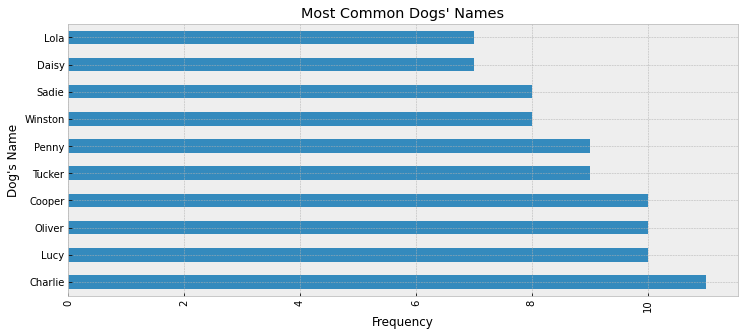

In [1936]:
plt.figure(figsize=(12,5));
master_dataset.dog_name.value_counts().sort_values(ascending =False)[1:11].plot(kind='barh')
plt.title("Most Common Dogs' Names")
plt.ylabel("Dog's Name")
plt.xlabel('Frequency')
plt.xticks(rotation=90);

Text(0.5, 0, 'Frequency')

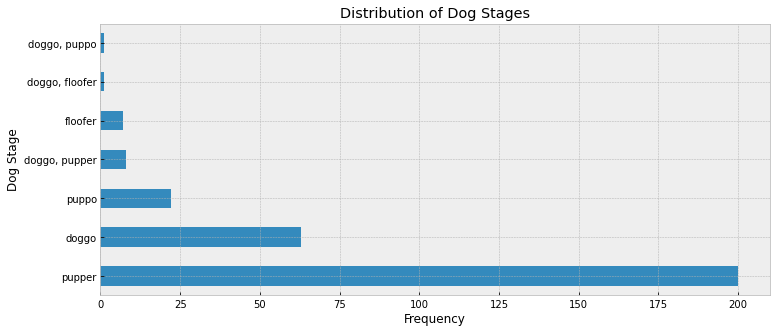

In [1960]:
# select the dog_ stage frequencies
plt.figure(figsize=(12,5));
master_dataset.dog_stage.value_counts().sort_values(ascending =False)[:].plot(kind='barh')
plt.title("Distribution of Dog Stages")
plt.ylabel('Dog Stage')
plt.xlabel('Frequency')
#plt.xticks(rotation=90);

In [1938]:
df_available_dog = master_dataset.query('confidence >= 0.7 ')
series_breeds = df_available_dog.confidence.value_counts()
series_breeds[:]

0.786089    2
0.873233    2
0.896422    1
0.929390    1
0.711235    1
           ..
0.791416    1
0.738449    1
0.808978    1
0.735480    1
0.708034    1
Name: confidence, Length: 616, dtype: int64

In [1939]:
master_dataset.dog_score.describe()

count    1965.000000
mean       10.530557
std         2.182064
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: dog_score, dtype: float64

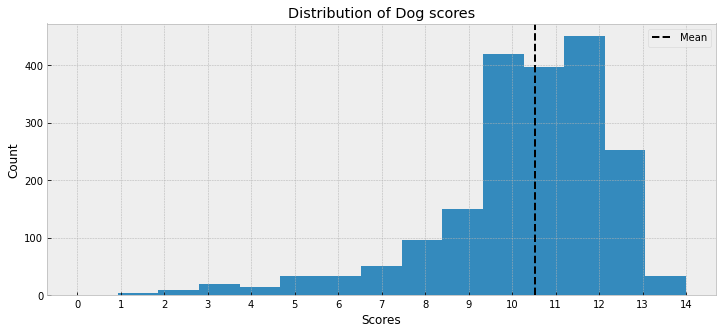

In [1940]:
# histogram for the dog score
plt.figure(figsize=(12,5));
master_dataset.dog_score.hist(bins=15)
plt.title('Distribution of Dog scores')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.axvline(x= master_dataset.dog_score.mean(),color='black', linestyle='--',label ='Mean')
plt.xticks(np.arange(15))
plt.legend(loc=0);


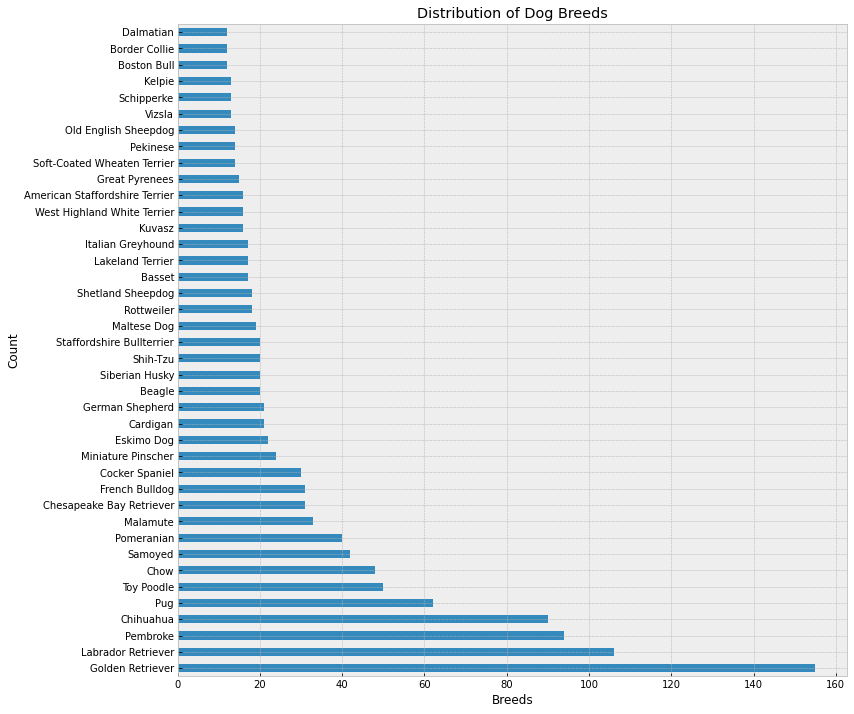

In [1956]:
#frequency for dog breeds
plt.figure(figsize=(12,12));
master_dataset.dog_breed.value_counts(ascending = False)[:40].plot(kind='barh')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count');

# Which is the most popular day/month to post a dog photo?


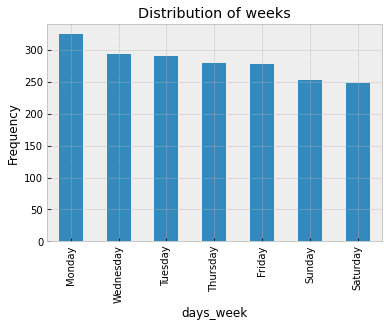

In [1958]:
master_dataset.day.value_counts(ascending = False)[:].plot(kind='bar')
plt.title("Distribution of weeks")
plt.xlabel('days_week')
plt.ylabel('Frequency');


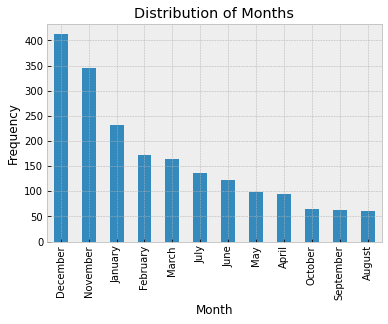

In [1959]:
master_dataset.month.value_counts(ascending = False)[:].plot(kind='bar')
plt.title("Distribution of Months")
plt.xlabel('Month')
plt.ylabel('Frequency');

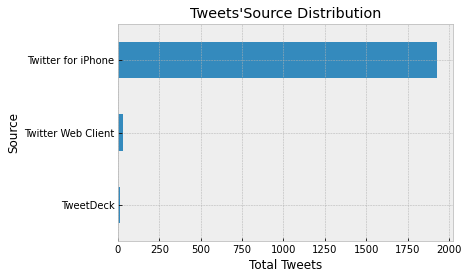

In [1945]:
plt.title("Tweets'Source Distribution")
master_dataset.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('Source');

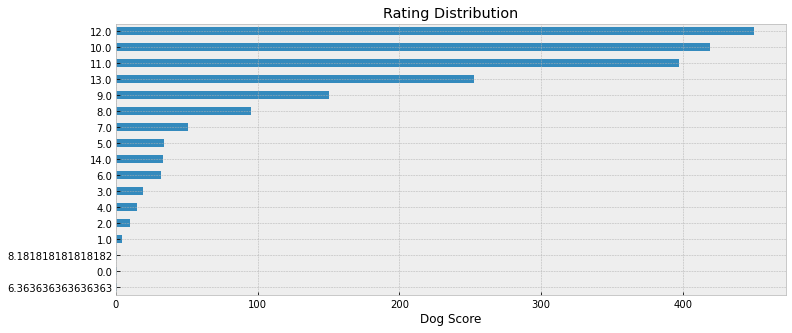

In [1947]:
plt.figure(figsize=(12,5));
plt.title("Rating Distribution")
master_dataset.dog_score.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Dog Score')
plt.ylabel('');